# Comparación de modelos

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Funciones auxiliares generales
def filtrar_outliers(df, columna, p_inf=0.01, p_sup=0.99):
    """Filtra valores extremos de una columna numérica usando percentiles."""
    lim_inf = df[columna].quantile(p_inf)
    lim_sup = df[columna].quantile(p_sup)
    return df[df[columna].between(lim_inf, lim_sup)]

# Cargar y preparar los datos
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
    df["gluc"] = (df["gluc"] > 1).astype(int)
    df["age_years"] = (df["age"] / 365).astype(int)
    return df

def agregar_bmi(df):
    """Calcula el IMC y agrega las columnas 'BMI' e 'overweight' al DataFrame."""
    bmi = df["weight"] / ((df["height"] / 100) ** 2)
    df["BMI"] = bmi
    df["overweight"] = (bmi > 25).astype(int)
    return df

In [15]:
ruta = "C:/Users/trezz/Desktop/proyectosDeDesarrolloWeb/MedicalExamination/data/medical_examination.csv"
df = cargar_datos(ruta)
df = agregar_bmi(df)

# Filtrar outliers
for col in ["height", "weight", "ap_hi", "ap_lo", "BMI"]:
    df = filtrar_outliers(df, col)

In [11]:
# Definir X e y (uso age_years en lugar de age)
X = df.drop(columns=["cardio", "age"])
y = df["cardio"]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42, stratify=y
)

# Lista de modelos a comparar
modelos = [
    ("Regresión Logística", LogisticRegression(max_iter=5000 , solver="saga")),
    ("Árbol de Decisión", DecisionTreeClassifier(random_state=42)),
    ("Bosque Aleatorio", RandomForestClassifier(random_state=42))
]

In [ ]:
# Entrenar y evaluar cada modelo
#for nombre, modelo in modelos:
 #   modelo.fit(X_train, y_train)
  #  puntaje = modelo.score(X_test, y_test)
   # print(f"{nombre}: {puntaje:.4f}")

Regresión Logística: 0.7034
Árbol de Decisión: 0.6250
Bosque Aleatorio: 0.7099


Regresión Logística: 0.7034
Árbol de Decisión: 0.6250
Bosque Aleatorio: 0.7099


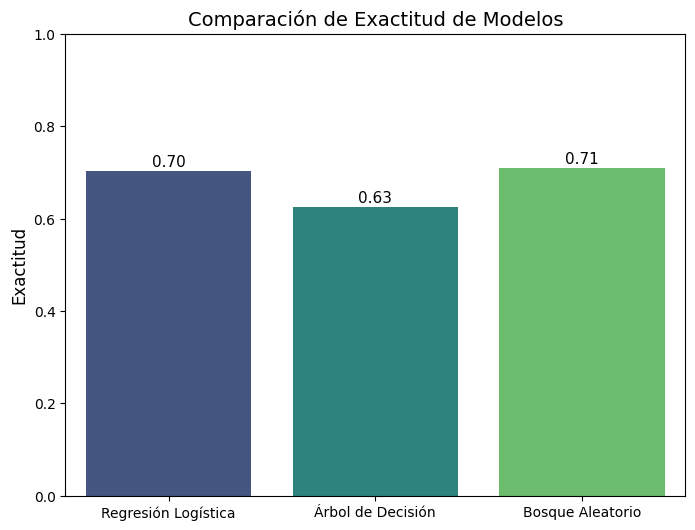

In [18]:
# Entrenar y evaluar cada modelo, guardando resultados
resultados = {}
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    puntaje = modelo.score(X_test, y_test)
    resultados[nombre] = puntaje
    print(f"{nombre}: {puntaje:.4f}")

# Visualizar resultados en gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(
    x=list(resultados.keys()),
    y=list(resultados.values()),
    hue=list(resultados.keys()),   # asigna cada modelo como hue
    dodge=False,                   # evita duplicar barras
    palette="viridis",
    legend=False                   # oculta la leyenda redundante
)

plt.title("Comparación de Exactitud de Modelos", fontsize=14)
plt.ylabel("Exactitud", fontsize=12)
plt.ylim(0,1)

# Mostrar valores encima de cada barra
for i, valor in enumerate(resultados.values()):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=11)

plt.show()
